## pandas.concat
    pandas.concat(  objs, 
                    axis=0, 
                    join='outer', 
                    join_axes=None, 
                    ignore_index=False, 
                    keys=None, 
                    levels=None, 
                    names=None, 
                    verify_integrity=False, 
                    sort=None, 
                    copy=True)

Concatenate pandas objects along a particular axis with optional set logic along the other axes.

- axis : {0/’index’, 1/’columns’}, default 0 - The axis to concatenate along
- join : {‘inner’, ‘outer’}, default ‘outer’  - How to handle indexes on other axis(es)
- ignore_index : boolean, default False

    If True, do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1. This is useful if you are concatenating objects where the concatenation axis does not have meaningful indexing information. Note the index values on the other axes are still respected in the join.


In [1]:
import pandas as pd

#### Ex

In [3]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])

In [4]:
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [5]:
# Clear the existing index and reset it in the result by setting the ignore_index option to True.

pd.concat([s1, s2], ignore_index=True)

0    a
1    b
2    c
3    d
dtype: object

#### Ex

In [6]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [7]:
df2 = pd.DataFrame([['c', 3], ['d', 4]], columns=['letter', 'number'])
df2

,letter,number
0,c,3
1,d,4


In [8]:
pd.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


Ex

In [9]:
df1 = pd.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df1

,letter,number
0,a,1
1,b,2


In [10]:
df2 = pd.DataFrame([['c', 3], ['d', 4], ['e', 5]], columns=['letter1', 'number1'])
df2

,letter1,number1
0,c,3
1,d,4
2,e,5


In [11]:
pd.concat([df1, df2], axis=1)

,letter,number,letter1,number1
0,a,1.0,c,3
1,b,2.0,d,4
2,NaN,NaN,e,5


Combine DataFrame objects with overlapping columns and return everything. Columns outside the intersection will be filled with NaN values.

In [12]:
df3 = pd.DataFrame([['c', 3, 'cat'], ['d', 4, 'dog']],
                    columns=['letter', 'number', 'animal'])
df3

,letter,number,animal
0,c,3,cat
1,d,4,dog


In [13]:
df1

,letter,number
0,a,1
1,b,2


In [14]:
pd.concat([df1, df3])

,letter,number,animal
0,a,1,NaN
1,b,2,NaN
0,c,3,cat
1,d,4,dog


Combine DataFrame objects with overlapping columns and return only those that are __shared__ by passing inner to the __join__ keyword argument.

In [15]:
pd.concat([df1, df3], join="inner")

,letter,number
0,a,1
1,b,2
0,c,3
1,d,4


Combine DataFrame objects horizontally along the x axis by passing in axis=1.

In [47]:
df4 = pd.DataFrame([['bird', 'polly'], 
                    ['monkey', 'george'],
                    ['sia', 'dimple']
                   ],
                    columns=['animal', 'name'])

df4

,animal,name
0,bird,polly
1,monkey,george
2,sia,dimple


In [48]:
pd.concat([df1, df4], axis=1)

,letter,number,animal,name
0,a,1.0,bird,polly
1,b,2.0,monkey,george
2,NaN,NaN,sia,dimple


#### Ex

In [52]:
df5 = pd.DataFrame([[10, 10], 
                    [20, 20],
                    [30, 30]
                   ],
                    columns=['col1', 'col2'])

df5

,col1,col2
0,10,10
1,20,20
2,30,30


In [53]:
df6 = pd.DataFrame([[10, 1], 
                    [20, 2],
                    [30, 3]
                   ],
                    columns=['col1', 'col2'])

df6

,col1,col2
0,10,1
1,20,2
2,30,3


In [ ]:
# dfA[10, 10] and dfB[10, 1]...to get dfC[10, 11] ?

#### Ex

In [35]:
df_offers = pd.read_excel(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [36]:
df_transactions = pd.read_excel(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions.head()

,customer_name,offer_id
0,Smith,2
1,Smith,24
2,Johnson,17
3,Johnson,24
4,Johnson,26


In [37]:
df_transactions['n'] = 1

In [38]:
user_usage = pd.read_csv(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\user_usage.csv")
user_device = pd.read_csv(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\user_device.csv")
device = pd.read_csv(r"E:\MYLEARN\2-ANALYTICS-DataScience\datasets\device.csv")

In [9]:
user_usage.head(5)


,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [10]:
user_device.head(5)

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [11]:
device.head(5)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [12]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id')

In [13]:
result.head(5)

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


#### Ex

In [14]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [15]:
frames = [df1, df2, df3]

In [18]:
result = pd.concat(frames)

In [19]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


## Pandas merge

pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=True)


- left − A DataFrame object.
- right − Another DataFrame object.
- on − Columns (names) to join on. Must be found in both the left and right DataFrame objects.
- left_on − Columns from the left DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
- right_on − Columns from the right DataFrame to use as keys. Can either be column names or arrays with length equal to the length of the DataFrame.
- left_index − If True, use the index (row labels) from the left DataFrame as its join key(s). In case of a DataFrame with a MultiIndex (hierarchical), the number of levels must match the number of join keys from the right DataFrame.
- right_index − Same usage as left_index for the right DataFrame.
- how − One of 'left', 'right', 'outer', 'inner'. Defaults to inner. Each method has been described below.
- sort − Sort the result DataFrame by the join keys in lexicographical order. Defaults to True, setting to False will improve the performance substantially in many cases.

In [5]:
left = pd.DataFrame({ 'id':    [1,2,3,4,5],
                       'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
                       'subject_id':['sub1','sub2','sub4','sub6','sub5']})
left

,id,Name,subject_id
0,1,Alex,sub1
1,2,Amy,sub2
2,3,Allen,sub4
3,4,Alice,sub6
4,5,Ayoung,sub5


In [7]:
right = pd.DataFrame( {'id':   [1,2,3,4,5],
                       'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
                       'subject_id':['sub2','sub4','sub3','sub6','sub5']})
right

,id,Name,subject_id
0,1,Billy,sub2
1,2,Brian,sub4
2,3,Bran,sub3
3,4,Bryce,sub6
4,5,Betty,sub5


#### Merge Two DataFrames on a Key

In [9]:
pd.merge(left, right, on='id')

,id,Name_x,subject_id_x,Name_y,subject_id_y
0,1,Alex,sub1,Billy,sub2
1,2,Amy,sub2,Brian,sub4
2,3,Allen,sub4,Bran,sub3
3,4,Alice,sub6,Bryce,sub6
4,5,Ayoung,sub5,Betty,sub5


#### Merge Two DataFrames on Multiple Keys

In [10]:
pd.merge(left, right, on=['id','subject_id'])

,id,Name_x,subject_id,Name_y
0,4,Alice,sub6,Bryce
1,5,Ayoung,sub5,Betty


## Merge Using 'how' Argument

The how argument to merge specifies how to determine which keys are to be included in the resulting table. If a key combination does not appear in either the left or the right tables, the values in the joined table will be NA.

|Merge Method |SQL Equivalent    |Description|
|------------ |--------------    |-----------|
|left         |LEFT OUTER JOIN   |Use keys from left object|
|right	|RIGHT OUTER JOIN	|Use keys from right object|
|outer	|FULL OUTER JOIN	|Use union of keys|
|inner	|INNER JOIN	Use |intersection of keys|

In [12]:
pd.merge(left, right, on='subject_id', how='left')

,id_x,Name_x,subject_id,id_y,Name_y
0,1,Alex,sub1,NaN,NaN
1,2,Amy,sub2,1.0,Billy
2,3,Allen,sub4,2.0,Brian
3,4,Alice,sub6,4.0,Bryce
4,5,Ayoung,sub5,5.0,Betty


In [13]:
pd.merge(left, right, on='subject_id', how='right')

,id_x,Name_x,subject_id,id_y,Name_y
0,2.0,Amy,sub2,1,Billy
1,3.0,Allen,sub4,2,Brian
2,4.0,Alice,sub6,4,Bryce
3,5.0,Ayoung,sub5,5,Betty
4,NaN,NaN,sub3,3,Bran


In [14]:
pd.merge(left, right, how='outer', on='subject_id')

,id_x,Name_x,subject_id,id_y,Name_y
0,1.0,Alex,sub1,NaN,NaN
1,2.0,Amy,sub2,1.0,Billy
2,3.0,Allen,sub4,2.0,Brian
3,4.0,Alice,sub6,4.0,Bryce
4,5.0,Ayoung,sub5,5.0,Betty
5,NaN,NaN,sub3,3.0,Bran


In [15]:
pd.merge(left, right, on='subject_id', how='inner')

,id_x,Name_x,subject_id,id_y,Name_y
0,2,Amy,sub2,1,Billy
1,3,Allen,sub4,2,Brian
2,4,Alice,sub6,4,Bryce
3,5,Ayoung,sub5,5,Betty


## Merge data frames (inner, outer, right, left join)

In [2]:
import pandas as pd
import numpy as np

In [6]:
# data frame 1
d1 = {'Customer_id': pd.Series([1,2,3,4,5,6]),
      'Product': pd.Series(['Oven','Oven','Oven','Television','Television','Television'])}

df1 = pd.DataFrame(d1)
df1

,Customer_id,Product
0,1,Oven
1,2,Oven
2,3,Oven
3,4,Television
4,5,Television
5,6,Television


In [7]:
# data frame 2
d2 = {'Customer_id': pd.Series([2,4,6,7,8]),
      'State': pd.Series(['California','California','Texas','New York','Indiana'])}

df2 = pd.DataFrame(d2)
df2

,Customer_id,State
0,2,California
1,4,California
2,6,Texas
3,7,New York
4,8,Indiana


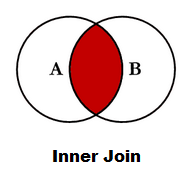

In [8]:
inner_join_df= pd.merge(df1, df2, on='Customer_id', how='inner')
inner_join_df 

,Customer_id,Product,State
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas


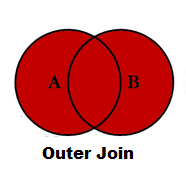

In [9]:
outer_join_df=pd.merge(df1, df2, on='Customer_id', how='outer')
outer_join_df

,Customer_id,Product,State
0,1,Oven,NaN
1,2,Oven,California
2,3,Oven,NaN
3,4,Television,California
4,5,Television,NaN
5,6,Television,Texas
6,7,NaN,New York
7,8,NaN,Indiana


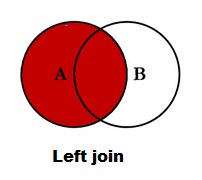

In [10]:
left_join_df= pd.merge(df1, df2, on='Customer_id', how='left')
left_join_df 

,Customer_id,Product,State
0,1,Oven,NaN
1,2,Oven,California
2,3,Oven,NaN
3,4,Television,California
4,5,Television,NaN
5,6,Television,Texas


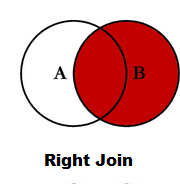

In [11]:
right_join_df= pd.merge(df1, df2, on='Customer_id', how='right')
right_join_df 

,Customer_id,Product,State
0,2,Oven,California
1,4,Television,California
2,6,Television,Texas
3,7,NaN,New York
4,8,NaN,Indiana
